In [8]:
import os 
import pickle 
import numpy as np 
import matplotlib.pyplot as plt

In [374]:
def read_file(path_name):
    f = open(path_name,'rb')
    data = pickle.load(f)
    f.close()
    return data

def get_all_path(name,prefix):
    name = ['data/plots/ex{}40m{}_result_100_{}.pkl'.format(prefix,seed,name) 
            for seed in ['s0','s5','s10']]
    return name
        
def get_stat(names,num):
    means, stds, times = [],[],[]
    for path in names:
        if os.path.isfile(path):
            data = read_file(path)
            mean = data[:,0]
            std = data[:,1]
            if data.shape[1]==3:
                time = data[:,2]
            else:
                time= np.ones(num)*(-1)
        else :
            pass
        if len(mean)>=num and len(std)>=num and len(time)>=num:
            means.append(mean[:num])
            stds.append(std[:num])
            if time[0]>=0:
                times.append(time[:num])
    means = np.array(means)
    means[np.isnan(means)] = 0
    times = np.array(times)
    times[np.isnan(times)] = 0
    stds = np.array(stds)
    stds[np.isnan(stds)] = 0
#     if len(times) >0:
#         stat = np.array([np.mean(means,axis=0),np.min(stds,axis=0),np.mean(times,axis=0)])
#     else:
        
#         stat = np.array([np.mean(means,axis=0),np.mean(stds,axis=0)])           
#     return stat
    if len(times) >0:
        stat = [means,stds,times]
    else:
        
        stat = [means,stds]    
    return stat


def f(game_list,num):
    qr ,tb = [],[]
    for name in game_list:
#         print('name is {}'.format(name))
        qrnames = get_all_path(name,'qrdqn')
        tbnames = get_all_path(name,'tbqrdqn')
        qrstat = get_stat(qrnames,num)
        tbstat = get_stat(tbnames,num)
        qrmean = np.mean(qrstat[0],axis=0)
        tbmean = np.mean(tbstat[0],axis=0)
        
        qrmax = np.max(qrstat[1],axis=0)
        tbmin = np.min(tbstat[1],axis=0)
        ratio = tbmin/qrmax
        qrstd = np.mean(qrstat[1],axis=0)*0.8
        tbstd = qrstd*ratio*0.8
        qrstat = np.array([qrmean,qrstd])
        tbstat = np.array([tbmean,tbstd])
        qr.append(qrstat)
        tb.append(tbstat)
    return qr,tb
        
def get_sorted_list(list,idx):
    x = [list[a] for a in idx]
    return x 
def get_xlabel(x):
    return ['{}%'.format(int(s)*100) for s in x]
def get_label(x):
    return ['{}'.format(int(s)) for s in x ]


In [375]:
game_list = ['Venture','Tennis','Hero','Kangaroo','KungFuMaster','Breakout',
            'Atlantis','StarGunner']
qr,tb = f(game_list,625)
qr[0].shape

/home/sufedc_nvidia_wangjianing/anaconda3/envs/rl/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in true_divide
/home/sufedc_nvidia_wangjianing/anaconda3/envs/rl/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in true_divide
/home/sufedc_nvidia_wangjianing/anaconda3/envs/rl/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in multiply


(2, 625)

In [376]:
data = read_file('data/plots/exqrdqn_result_100_MontezumaRevenge.pkl')
data.shape
data.shape[1]==3
time= np.ones(1250)*(-1)
# time= np.ones(625)*(-1)
# time[0]>=0
times=[]
times=np.array(times)
len(times)

0

In [377]:
endqr_name = ['data/plots/exqrdqn40ms10_result_100_Enduro.pkl',
'data/plots/exqrdqn40ms5_result_100_Enduro.pkl',
'data/plots/exqrdqn_result_100_Enduro.pkl']
endtb_name = ['data/plots/extbqrdqn40ms10_result_100_Enduro.pkl',
'data/plots/extbqrdqn40ms5_result_100_Enduro.pkl',
'data/plots/extbqrdqn_result_100_Enduro.pkl']

qren_stat = get_stat(endqr_name,625)
tben_stat = get_stat(endtb_name,625)
qrmean = np.mean(qren_stat[0],axis=0)
tbmean = np.mean(tben_stat[0],axis=0)

qrmax = np.max(qren_stat[1],axis=0)
tbmin = np.min(tben_stat[1],axis=0)
ratio = tbmin/qrmax
qrstd = np.mean(qren_stat[1],axis=0)
tbstd = qrstd*ratio
qren_stat = np.array([qrmean,qrstd])
tben_stat = np.array([tbmean,tbstd])
qr[1] = qren_stat
tb[1] = tben_stat
game_list[1]='Enduro'
qr[1].shape

/home/sufedc_nvidia_wangjianing/anaconda3/envs/rl/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


(2, 625)

In [378]:
endqr_name = ['data/plots/exqrdqn_result_100_MontezumaRevenge.pkl',
]
endtb_name = ['data/plots/extbqrdqn80ms10_result_100_MontezumaRevenge.pkl',
'data/plots/extbqrdqn80ms5_result_100_MontezumaRevenge.pkl',
'data/plots/extbqrdqn_result_100_MontezumaRevenge.pkl']

qren_stat = get_stat(endqr_name,1250)
tben_stat = get_stat(endtb_name,1250)
qrmean = np.mean(qren_stat[0],axis=0)
tbmean = np.mean(tben_stat[0],axis=0)


qrstd = np.max(qren_stat[1],axis=0)
tbstd = np.min(tben_stat[1],axis=0)
qren_stat = np.array([qrmean,qrstd])
tben_stat = np.array([tbmean,tbstd])
print(qren_stat.shape)
qr.append(qren_stat)
tb.append(tben_stat)
game_list.append('MontezumaRevenge')

(2, 1250)


IndexError: index 3 is out of bounds for axis 0 with size 3

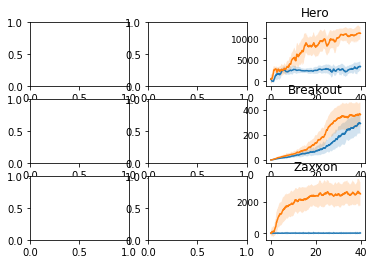

In [106]:
fig, ax = plt.subplots(3,3)
x = np.arange(0,qr[0].shape[1])/qr[0].shape[1]*40
for i in range(9):
    
        ax[i,j].plot(x,qr[i*3+j][0],label='QR-DQN')
        ax[i,j].plot(x,tb[i*3+j][0],label='NC-QR-DQN')
        ax[i,j].fill_between(x,qr[i*3+j][0]-qr[i*3+j][1],qr[i*3+j][0]+qr[i*3+j][1] ,alpha=0.2)
        ax[i,j].fill_between(x,tb[i*3+j][0]-tb[i*3+j][1],tb[i*3+j][0]+tb[i*3+j][1],alpha=0.2)
        ax[i,j].set_title(game_list[i*3+j])
        ticklabel = get_label(ax[i,j].get_yticks())
        ax[i,j].set_yticklabels(ticklabel,fontdict={'size':9})
plt.figure(figsize=(10, 20))
        # plt.subplots_adjust(hspace=1.2, wspace=0.4)
# fig.savefig('../quantile_curve/trainingcurve.png',dpi=600,format='png')
fig = plt.figure(figsize=(8, 20))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

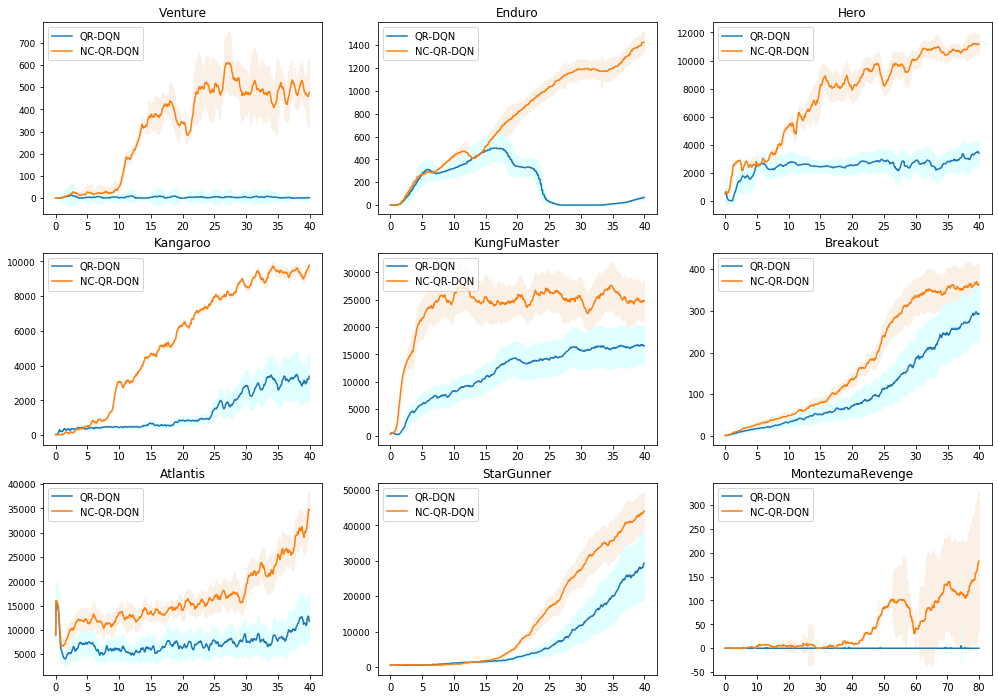

In [380]:
# plt.subplots_adjust(hspace=0.5, wspace=1)

fig = plt.figure(figsize=(17, 12))
x = np.arange(0,qr[0].shape[1])/qr[0].shape[1]*40
for i in range(8):
        ax = fig.add_subplot(3, 3, i+1)
        
        ax.plot(x,qr[i][0],label='QR-DQN')
        ax.plot(x,tb[i][0],label='NC-QR-DQN')
        ax.fill_between(x,tb[i][0]-tb[i][1],tb[i][0]+tb[i][1],color='linen')        
        ax.fill_between(x,qr[i][0]-qr[i][1],qr[i][0]+qr[i][1] ,color='lightcyan')

        ax.set_title(game_list[i])
        ticklabel = get_label(ax.get_yticks())
        ax.set_yticklabels(ticklabel,fontdict={'size':9})
        ax.legend(loc=2)

        
i=8
x = np.arange(0,qr[-1].shape[1])/qr[-1].shape[1]*80
ax = fig.add_subplot(3, 3, i+1)

ax.plot(x,qr[i][0],label='QR-DQN')
ax.plot(x,tb[i][0],label='NC-QR-DQN')
ax.fill_between(x,tb[i][0]-tb[i][1],tb[i][0]+tb[i][1],color='linen')
ax.fill_between(x,qr[i][0]-qr[i][1],qr[i][0]+qr[i][1] ,color='lightcyan')

ax.set_title(game_list[i])
ticklabel = get_label(ax.get_yticks())
ax.set_yticklabels(ticklabel,fontdict={'size':9})
ax.legend(loc=2)
# plt.figure(figsize=(10, 20))
        # plt.subplots_adjust(hspace=1.2, wspace=0.4)
# plt.legend()
fig.savefig('../quantile_curve/trainingcurve.eps',dpi=600,format='eps')
# fig = plt.figure(figsize=(8, 20))

# for i in range(0,10):
#     ax = fig.add_subplot(5, 2, i+1)
#     plt.plot(x, y, 'o')
#     ax.xaxis.set_visible(False)
#     ax.yaxis.set_visible(False)
#     # x and y axis should be equal length
#     x0,x1 = ax.get_xlim()
#     y0,y1 = ax.get_ylim()
#     ax.set_aspect(abs(x1-x0)/abs(y1-y0))

# plt.show()
# fig.savefig('plot.pdf', bbox_inches='tight')

In [254]:
def read_file(path_name):
    f = open(path_name,'rb')
    data = pickle.load(f)
    f.close()
    return data
def get_all_path(name,prefix):

    return 'data/plots/ex{}40ms0_result_100_{}.pkl'.format(prefix,name)
game_list = ['Tutankham','BankHeist','DemonAttack','Freeway','Kangaroo','Gopher',
            'NameThisGame','RoadRunner','Seaquest','KungFuMaster','Krull',
            'WizardOfWor','Alien','BeamRider','Bowling','Asterix','Jamesbond',
            'MsPacman','Qbert','Breakout','CrazyClimber','FishingDerby',
            'Pong','StarGunner']
# for name in game_list:
#     path = get_all_path(name,'qrdqn')
#     print(read_file(path).shape)
#     path = get_all_path(name,'tbqrdqn')
#     print(read_file(path).shape)
path = get_all_path('FishingDerby','qrdqn')
read_file(path)[:,0]

In [293]:
def read_file(path_name):
    f = open(path_name,'rb')
    data = pickle.load(f)
    f.close()
    return data

def get_all_path(name,prefix):

    return 'data/plots/ex{}40ms0_result_100_{}.pkl'.format(prefix,name)
   
def get_idx(mean,thresh):
    for i in range(len(mean)-1):
#         print(i)
        if (thresh-mean[i])*(thresh-mean[i+1])<0:
            return i
    print('not find!')
    return
def get_stat(data,qmax,qmin,frac):
    stat = []
#     data = read_file(names)
    mean = data[:,0]
    mean[np.isnan(mean)] = mean[5]
    mean = mean -qmin
#     print(mean)
    std = data[:,1]
    time = data[:,2]
    for f in frac:
#         print(f)
#         print((qmax-qmin)*f)
        idx = get_idx(mean,(qmax-qmin)*f)
        t = time[idx]
        stat.append(t)
    stat = np.array(stat)           
    return stat
def get_lim(data):

    r = data[:,0]
    r[np.isnan(r)] = r[5]
    return np.max(r),np.min(r)
    
    
def f(game_list,frac):
    qr ,tb ,ratio= [],[],[]
    for name in game_list:
#         print('name is {}'.format(name))
        qrnames = get_all_path(name,'qrdqn')
        tbnames = get_all_path(name,'tbqrdqn')
        qrdata = read_file(qrnames)
        tbdata = read_file(tbnames)
        
        qmax , qmin = get_lim(qrdata)
#         print(qmax,qmin)
        qrstat = get_stat(qrdata,qmax,qmin,frac)
        tbstat = get_stat(tbdata,qmax,qmin,frac)
        qr.append(qrstat)
        tb.append(tbstat)
        ratio.append(tbstat/qrstat)
    ratio = np.array(ratio)
    return qr,tb,ratio
        
def get_sorted_list(list,idx):
    x = [list[a] for a in idx]
    return x 
def get_xlabel(x):
    return ['{}%'.format(int(s)*100) for s in x]
def get_label(x):
    return ['{}'.format(int(s)) for s in x ]


In [331]:
# fraction =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.93]
fraction = np.arange(0.15,0.95,0.05)
print(fraction)
game_list = ['Tutankham','BankHeist','DemonAttack','Kangaroo','Gopher',
            'NameThisGame','RoadRunner','Seaquest','KungFuMaster',
            'WizardOfWor','Alien','Asterix','Jamesbond',
            'MsPacman','Qbert','Breakout','CrazyClimber','FishingDerby',
            'Pong','StarGunner']
qr,tb,ratio = f(game_list,fraction)
mean = np.mean(ratio,axis=0)
std = np.std(ratio,axis=0)
print(mean)
# print(std)
# print(ratio)


[0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8
 0.85 0.9 ]
[0.70709934 0.70430708 0.8097995  0.76800889 0.75824283 0.70247158
 0.71309487 0.76623124 0.7100512  0.70955048 0.70446091 0.73472264
 0.72789729 0.68916222 0.70146333 0.69524208]


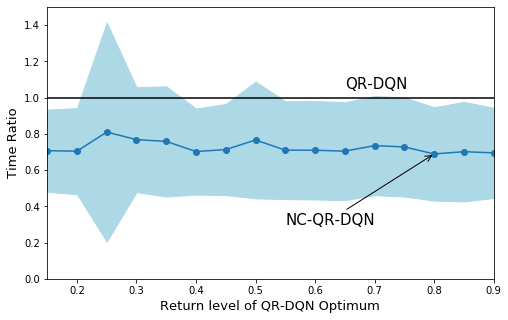

In [356]:
fig = plt.figure(figsize=(8, 5))
# x = np.arange(0,qr[0].shape[1])/qr[0].shape[1]*40
ax = fig.add_subplot(1, 1, 1)
ax.plot(fraction,np.ones(len(fraction)),label='QR-DQN',color='black')
ax.plot(fraction,mean,marker='o',label='NC-QR-DQN')
ax.fill_between(fraction,mean-std,mean+std ,color='lightblue')
ax.set_xlim(0.15,0.9)
ax.set_ylim(0,1.5)
ax.annotate('NC-QR-DQN', xy=(0.8, 0.6891), xytext=(0.55, 0.3), fontsize=15,arrowprops=dict(arrowstyle='->'))
ax.set_ylabel('Time Ratio',fontsize=13)
ax.set_xlabel('Return level of QR-DQN Optimum',fontsize=13)
plt.text(0.65, 1.05, r'QR-DQN',fontsize=15)

# ax.fill_between(fraction,tb[i][0]-tb[i][1],tb[i][0]+tb[i][1],color='bisque')
# ax.set_title(game_list[i])
# ticklabel = get_label(ax.get_yticks())
# ax.set_yticklabels(ticklabel,fontdict={'size':9})
# ax.legend(loc=2)
fig.savefig('../quantile_curve/timecost.eps',dpi=600,format='eps')

In [405]:
def read_file(path_name):
    f = open(path_name,'rb')
    data = pickle.load(f)
    f.close()
    return data

def get_all_path(name,prefix):

    return 'data/plots/ex{}40ms0_result_100_{}.pkl'.format(prefix,name)
   
def get_idx(mean,thresh):
    for i in range(len(mean)-1):
#         print(i)
        if (thresh-mean[i])*(thresh-mean[i+1])<0:
            return i
    print('not find!')
    return
def get_stat(data,qmax,qmin,frac):
    stat = []
#     data = read_file(names)
    mean = data[:,0]
    mean[np.isnan(mean)] = mean[5]
    mean = mean -qmin
#     print(mean)
    std = data[:,1]
    time = data[:,2]
    for f in frac:
#         print(f)
#         print((qmax-qmin)*f)
        idx = get_idx(mean,(qmax-qmin)*f)
        t = time[idx]
        stat.append(t)
    stat = np.array(stat)           
    return stat
def get_lim(data):

    r = data[:,0]
    r[np.isnan(r)] = r[5]
    return np.max(r),np.min(r)
    
    
def f(game_list):
    ratio= []
    for name in game_list:
#         print('name is {}'.format(name))
        qrnames = get_all_path(name,'qrdqn')
        tbnames = get_all_path(name,'tbqrdqn')
        qrdata = read_file(qrnames)
        tbdata = read_file(tbnames)
        qrtime = qrdata[:,2]
        diffqr = qrtime[1:]-qrtime[:-1]
        tbtime = tbdata[:,2]
        difftb = tbtime[1:]-tbtime[:-1]
#         qmax , qmin = get_lim(qrdata)
#         print(qmax,qmin)

        ratio.append(difftb[:500]/diffqr[:500])
    ratio = np.array(ratio)
    return ratio
        
def get_sorted_list(list,idx):
    x = [list[a] for a in idx]
    return x 
def get_xlabel(x):
    return ['{}%'.format(int(s)*100) for s in x]
def get_label(x):
    return ['{}'.format(int(s)) for s in x ]


In [407]:
# fraction =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.93]
fraction = np.arange(0.15,0.95,0.05)
print(fraction)
game_list = ['Tutankham','BankHeist','DemonAttack','Kangaroo','Gopher',
            'NameThisGame','RoadRunner','Seaquest','KungFuMaster',
            'WizardOfWor','Alien','Asterix','Jamesbond',
            'MsPacman','Qbert','Breakout','CrazyClimber','FishingDerby',
            'Pong','StarGunner']
ratio = f(game_list)
# mean = np.mean(ratio,axis=0)
# std = np.std(ratio,axis=0)
# print(mean)
# print(std)
print(np.mean(ratio))
print(ratio)


[0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8
 0.85 0.9 ]
1.0560594433837778
[[1.2407155  1.02900351 0.95682753 ... 1.01704596 0.99235568 0.98843257]
 [1.19041794 1.22557213 1.24789178 ... 0.94975442 0.95672749 0.9719174 ]
 [1.7319356  1.7641259  1.70943396 ... 1.04141012 1.00143592 0.93781036]
 ...
 [1.23044525 1.15977927 1.05701384 ... 1.0031617  0.98785349 0.9961233 ]
 [1.22006303 1.25175278 1.33815054 ... 1.101459   1.09274409 1.09248141]
 [1.19937636 1.27247397 1.16888478 ... 1.02636995 1.02256034 0.9891342 ]]


In [412]:
def read_file(path_name):
    f = open(path_name,'rb')
    data = pickle.load(f)
    f.close()
    return data

def get_all_path(name,prefix):

    return 'data/plots/ex{}40ms0_result_100_{}.pkl'.format(prefix,name)
   
def get_idx(mean,thresh):
    for i in range(len(mean)-1):
#         print(i)
        if (thresh-mean[i])*(thresh-mean[i+1])<0:
            return i
    print('not find!')
    return
def get_stat(data,qmax,qmin,frac):
    stat = []
#     data = read_file(names)
    mean = data[:,0]
    mean[np.isnan(mean)] = mean[5]
    mean = mean -qmin
#     print(mean)
    std = data[:,1]
    time = data[:,2]
    for f in frac:
#         print(f)
#         print((qmax-qmin)*f)
        idx = get_idx(mean,(qmax-qmin)*f)
        t = time[idx]
        stat.append(t)
    stat = np.array(stat)           
    return stat
def get_lim(data):

    r = data[:,0]
    r[np.isnan(r)] = r[5]
    return np.max(r),np.min(r)
    
    
def f(game_list):
    ratio= []
    for name in game_list:
#         print('name is {}'.format(name))
        qrnames = get_all_path(name,'qrdqn')
        tbnames = get_all_path(name,'tbqrdqn')
        qrdata = read_file(qrnames)
        tbdata = read_file(tbnames)
        qrtime = qrdata[:,2]
        diffqr = qrtime[1:]-qrtime[:-1]
        tbtime = tbdata[:,2]
        difftb = tbtime[1:]-tbtime[:-1]
#         qmax , qmin = get_lim(qrdata)
#         print(qmax,qmin)
        length = min(len(diffqr),len(difftb))
        
        ratio.append(difftb[:500]/diffqr[:500])
#     ratio = np.array(ratio)
    return ratio
        
def get_sorted_list(list,idx):
    x = [list[a] for a in idx]
    return x 
def get_xlabel(x):
    return ['{}%'.format(int(s)*100) for s in x]
def get_label(x):
    return ['{}'.format(int(s)) for s in x ]


In [413]:
# fraction =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.93]
fraction = np.arange(0.15,0.95,0.05)
print(fraction)
game_list = ['Venture','MontezumaRevenge','Breakout']
ratio = f(game_list)
# mean = np.mean(ratio,axis=0)
# std = np.std(ratio,axis=0)
# print(mean)
# print(std)
print(np.mean([np.mean(x) for x in ratio]))


[0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8
 0.85 0.9 ]
1.1022364075825393


In [414]:
def read_file(path_name):
    f = open(path_name,'rb')
    data = pickle.load(f)
    f.close()
    return data

def get_all_path(name,prefix):

    return 'data/plots/newex{}_result_100_{}.pkl'.format(prefix,name)
   
def get_idx(mean,thresh):
    for i in range(len(mean)-1):
#         print(i)
        if (thresh-mean[i])*(thresh-mean[i+1])<0:
            return i
    print('not find!')
    return
def get_stat(data,qmax,qmin,frac):
    stat = []
#     data = read_file(names)
    mean = data[:,0]
    mean[np.isnan(mean)] = mean[5]
    mean = mean -qmin
#     print(mean)
    std = data[:,1]
    time = data[:,2]
    for f in frac:
#         print(f)
#         print((qmax-qmin)*f)
        idx = get_idx(mean,(qmax-qmin)*f)
        t = time[idx]
        stat.append(t)
    stat = np.array(stat)           
    return stat
def get_lim(data):

    r = data[:,0]
    r[np.isnan(r)] = r[5]
    return np.max(r),np.min(r)
    
    
def f(game_list):
    ratio= []
    for name in game_list:
#         print('name is {}'.format(name))
        qrnames = get_all_path(name,'qrdqn80ms10')
        tbnames = get_all_path(name,'tbqrdqn40ms5')
        qrdata = read_file(qrnames)
        tbdata = read_file(tbnames)
        qrtime = qrdata[:,2]
        diffqr = qrtime[1:]-qrtime[:-1]
        tbtime = tbdata[:,2]
        difftb = tbtime[1:]-tbtime[:-1]
#         qmax , qmin = get_lim(qrdata)
#         print(qmax,qmin)
        length = min(len(diffqr),len(difftb))
        
        ratio.append(difftb[:length]/diffqr[:length])
#     ratio = np.array(ratio)
    return ratio
        
def get_sorted_list(list,idx):
    x = [list[a] for a in idx]
    return x 
def get_xlabel(x):
    return ['{}%'.format(int(s)*100) for s in x]
def get_label(x):
    return ['{}'.format(int(s)) for s in x ]


In [415]:
# fraction =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.93]
fraction = np.arange(0.15,0.95,0.05)
print(fraction)
game_list = ['Venture','MontezumaRevenge','Breakout']
ratio = f(game_list)
# mean = np.mean(ratio,axis=0)
# std = np.std(ratio,axis=0)
# print(mean)
# print(std)
# print(np.mean([np.mean(x) for x in ratio]))
print(ratio
     )


[0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8
 0.85 0.9 ]
[array([1.11998288, 0.98746185, 1.0928452 , 1.03177272, 0.97802016,
       1.1427007 , 1.03563474, 1.00148183, 1.12443023, 1.00955146,
       1.05495178, 0.97865234, 1.05514102, 1.01655724, 0.98528753,
       1.07839257, 1.05653445, 1.09800218, 1.03012859, 1.08698651,
       0.99731676, 1.08076546, 1.10771847, 1.04252934, 1.08335206,
       1.09760855, 1.09512612, 1.06107199, 1.04390104, 1.06054788,
       0.99259415, 1.06705561, 1.11253994, 1.08861661, 1.02956791,
       1.10650388, 1.0270775 , 1.06070801, 1.07301635, 1.09799092,
       1.06438746, 1.09563129, 1.07075829, 1.02964644, 1.07957757,
       0.99430425, 1.14193597, 1.06547315, 1.08142949, 1.03439906,
       1.05347707, 1.07491171, 1.05088205, 1.06763816, 1.00884397,
       1.09299614, 1.13140734, 1.02936687, 1.16802374, 1.04574233]), array([0.91037587, 1.04711825, 1.15337213, 1.12523441, 1.07651496,
       1.14256619, 0.91122052, 0.83947036, 0

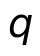

In [185]:
fig = plt.figure(figsize=(0.1, 0.1))
ax = fig.add_subplot(2, 5, i+1)
plt.title(r'$q_{\tau}(s,a)$',fontsize=40)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
fig.savefig('../quantile_curve/qt.eps',dpi=600,format='eps')